In [199]:
library(monocle)
library(ggplot2)
library(RColorBrewer)
library(viridis)
library(Seurat)

In [115]:
counts <- Read10X("./dcis1_norm_snv_matrix/")
scRNA <- CreateSeuratObject(counts = counts)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [116]:
meta <- read.csv('./dcis1.subclone.csv',row.names = 1)

In [118]:
scRNA@meta.data$cluster <- meta$RNA_cluster
scRNA@meta.data$SNVtypes <- meta$SNVtypes

In [119]:
diff.genes <- read.csv('./subclone.dif.gene')

In [228]:
# scRNA <- subset(x = scRNA,features = diff.genes$X0)

In [120]:
data <- as(as.matrix(scRNA@assays$RNA@counts), 'sparseMatrix')
pd <- new('AnnotatedDataFrame', data = scRNA@meta.data)
fData <- data.frame(gene_short_name = row.names(data), row.names = row.names(data))
fd <- new('AnnotatedDataFrame', data = fData)

In [121]:
cds <- newCellDataSet(as(as.matrix(data), "sparseMatrix"),
                phenoData = pd,
                featureData = fd,
                expressionFamily = gaussianff())

Warning message in gaussianff():
“gaussianff() is deprecated. Please modify your code to call uninormal() instead (the model will be similar but different internally). Returning uninormal() instead.”


In [122]:
mycds = setOrderingFilter(cds,diff.genes$snv)
mycds <- reduceDimension(mycds, max_components = 2, method = 'DDRTree',norm_method = 'none')
mycds <- orderCells(mycds)

Warning message in graph.dfs(dp_mst, root = root_cell, neimode = "all", unreachable = FALSE, :
“Argument `neimode' is deprecated; use `mode' instead”
Warning message in graph.dfs(dp_mst, root = root_cell, neimode = "all", unreachable = FALSE, :
“Argument `neimode' is deprecated; use `mode' instead”


In [363]:
# coul <- colorRampPalette(brewer.pal(8, "RdYlBu"))
colors <- rev(brewer.pal(9, "RdYlBu"))
mycds$new_SNVtypes <- ifelse(mycds$SNVtypes < 1000, 1000, mycds$SNVtypes)

In [364]:
p1 <- plot_cell_trajectory(mycds, color_by = "cluster",cell_size = 3) + scale_color_manual(breaks = c("subclone 0", "subclone 1", "subclone 2"), values=c("#B0C5D6", "#DEBA82", "#935F3B"))
p2 <- plot_cell_trajectory(mycds, color_by = "Pseudotime",cell_size = 3)+scale_color_viridis(option = 'plasma') # +scale_color_gradientn(colors = rev(brewer.pal(9, "RdYlBu"))) #scale_color_viridis(option = 'plasma')
p3 <- plot_cell_trajectory(mycds, color_by = "new_SNVtypes",cell_size = 3) + scale_color_gradientn(colours = colors)
pdf("./MainFigure/monocle.pdf", width = 15, height = 5)
p1|p2|p3
dev.off()

png 
  2

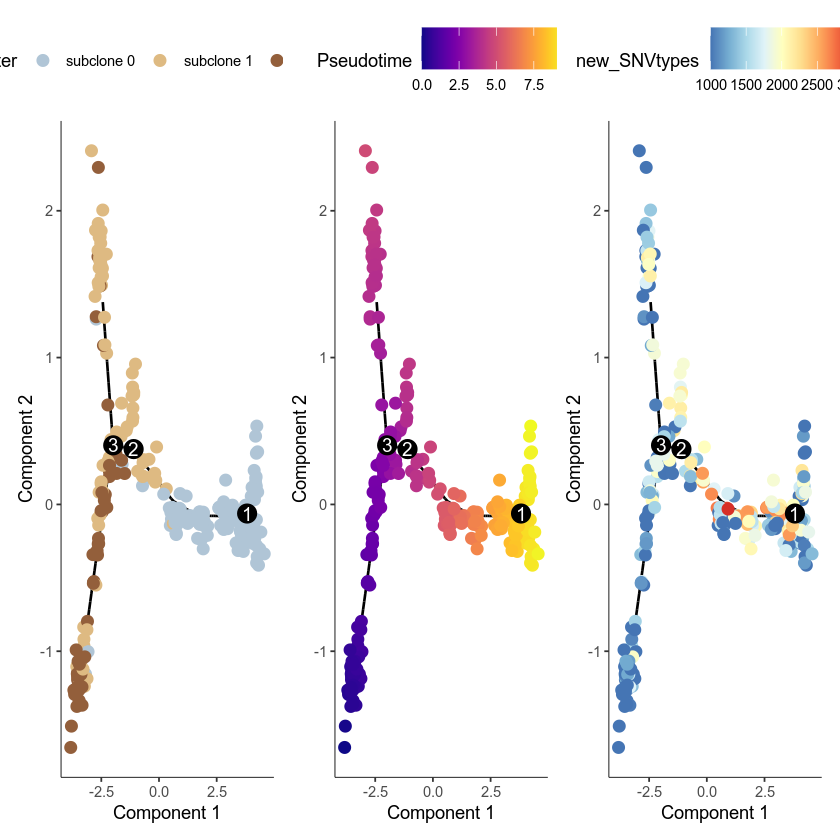

In [365]:
p1|p2|p3

In [362]:
mycds$SNVtypes

[1] 1192 1908  780 2250 2328 1519  638 1453 2714  871  754 1692 1632  696 1562
 [16] 2488 1659 1497 1222 1322 2313 1967 2148  411  350  555  790 2557 2919 1712
 [31] 2384  761  922  973  807 1890 2512 1761 2312 2598 1595 2015  762 1439  594
 [46] 1330 2223 1283 1276 1012 1258  451 2199 2674  883 2557 1094 1204  514  580
 [61] 1144 1353 1929  369  565 1350  884 2783 1983 1262 1903 1624 1904  363 1951
 [76] 1235 1873  567 1732 1337 2510 2651 1479 1004 1134 2125 2122 1561 1329 1981
 [91] 1074 1056 2076  860  869 1586 1710 1516 1064 1992  494  845  710 2622  615
[106]  456 1390 2103  806 2106 2736 1669  568  872 2402  926 1087 1911 1462 1839
[121] 1841 1974 1780  498  143 1767 1655 1744  793 2601 1278 1111 1252 2589 1386
[136] 2646 1805 1943 1637 1603 1816  784 2272 2124 2006  664 1625 1243 1931 1253
[151] 2508 1882 1065 1023 1008 1405 1174 1153 1307 1160 1203 2518 1169  599 1023
[166]  908 2488  571  808 1082  653 1713 1723 1041 1409  425 1549 1467 2210 2088
[181] 1043 1942 2655 2443 2550  682 1740 2182 1134 1550 1041 1410  195 1176 1802
[196] 1233 2594  627  435 1123 1878 2424  889 2165  924 1815 1916 1710  929 2040
[211]  874 1886 2348 1898 1393 1248  904 1003  579 1341  927 2161 2058 1331 1630
[226]  940  796 1948 1495 1757 1173 1661 1849 1240  501 1290 1811 1175 1435 2166
[241]  572 1708  855 1929  534 2218 1574 1332  442 1214  590  515 1020 2147 2593
[256] 1419  790  965 1640 1156 1161 2062  564  869 1924 2598 1930 3018 2030  898
[271] 1590 1497 1609 2003 1478  266 1893 2073 1430 1695 2128 2376 1923  924 1991
[286] 1809 1240

In [340]:
quantile_90

20% 
875.8

In [103]:
diff_test_res <- differentialGeneTest(mycds[diff.genes$snv,],
fullModelFormulaStr = "~sm.ns(Pseudotime)")

In [105]:
head(diff_test_res)

,status,family,pval,qval,gene_short_name,use_for_ordering
,<chr>,<chr>,<dbl>,<dbl>,<chr>,<lgl>
chr7-45183887:G>T,OK,uninormal,5.814442e-15,9.215890e-13,chr7-45183887:G>T,TRUE
chr7-45183945:G>A,OK,uninormal,3.694900e-12,1.464104e-10,chr7-45183945:G>A,TRUE
chr11-62242319:G>T,OK,uninormal,1.979595e-06,1.045886e-05,chr11-62242319:G>T,TRUE
chr3-50354787:C>T,OK,uninormal,4.976412e-11,1.577523e-09,chr3-50354787:C>T,TRUE
chrM-4509:T>C,OK,uninormal,2.160134e-06,1.104456e-05,chrM-4509:T>C,TRUE
chr21-27143181:T>C,OK,uninormal,1.223368e-06,7.051047e-06,chr21-27143181:T>C,TRUE


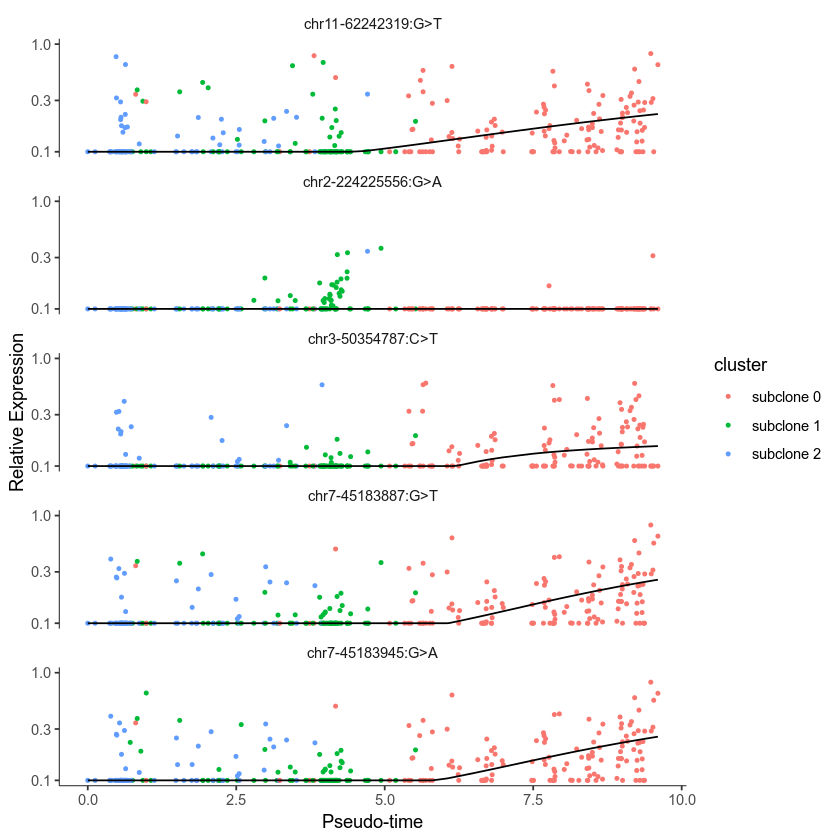

In [108]:
select = c("chr7-45183887:G>T","chr7-45183945:G>A","chr11-62242319:G>T","chr3-50354787:C>T","chr2-224225556:G>A")
cds_subset <- mycds[select,]
plot_genes_in_pseudotime(cds_subset, color_by = "cluster")

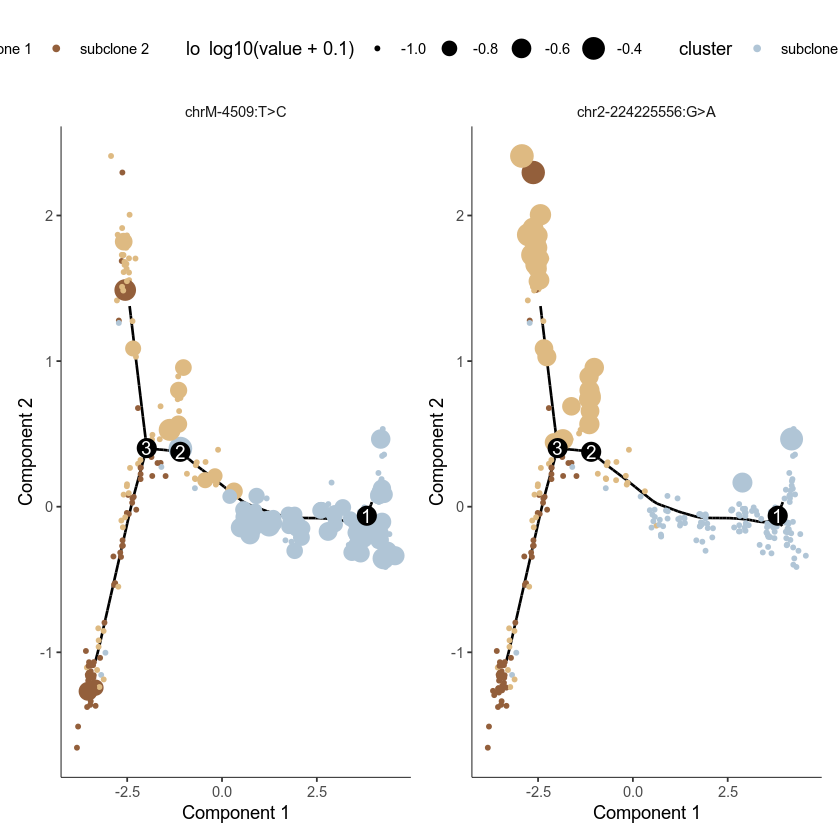

In [109]:
p1 <- plot_cell_trajectory(mycds, markers = "chrM-4509:T>C",color_by = "cluster" )+ scale_color_manual(breaks = c("subclone 0", "subclone 1", "subclone 2"), values=c("#B0C5D6", "#DEBA82", "#935F3B"))
p2 <- plot_cell_trajectory(mycds, markers = "chr2-224225556:G>A",color_by = "cluster" )+ scale_color_manual(breaks = c("subclone 0", "subclone 1", "subclone 2"), values=c("#B0C5D6", "#DEBA82", "#935F3B"))
p1 | p2

In [184]:
cell_names <- colnames(mycds)
reduced_dim_coords <- t(mycds@reducedDimS)
pseudotime_values <- pData(mycds)$Pseudotime

In [185]:
df <- data.frame(
  Cell = cell_names,
  X = reduced_dim_coords[, 1],
  Y = reduced_dim_coords[, 2],
  Pseudotime = pseudotime_values
)

In [188]:
write.csv(df, file = "cell_trajectory_data.csv", row.names = FALSE)